In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.optimize as optimize
import crr.reconstruct as reconstruct
import crr.scattered.sampling as sampling
import crr.scattered.roll_zeropad as roll_zeropad
matplotlib.rcParams['font.size'] = 16
import astropy.wcs as wcs

In [30]:
def wcs_simple(racen, deccen, pixscale, npix, pa):
    w = wcs.WCS(naxis=2)
    w.wcs.crpix = [npix // 2, npix // 2]
    w.wcs.cdelt = np.array([pixscale / 3600., pixscale / 3600.])
    w.wcs.crval = [racen, deccen]
    w.wcs.ctype = ["RA---TAN", "DEC--TAN"]
    w.pixel_shape = (npix, npix)
    w.wcs.pc[0, 0] = np.cos(pa * np.pi / 180.)
    w.wcs.pc[0, 1] = np.sin(pa * np.pi / 180.)
    w.wcs.pc[1, 0] = - np.sin(pa * np.pi / 180.)
    w.wcs.pc[1, 1] = np.cos(pa * np.pi / 180.)
    return(w)

In [31]:
n = 41
wi = wcs_simple(180., 0., 0.4, n, 0)
wo = wcs_simple(180., 0., 0.4, n, 0)

In [147]:
xi = np.outer(np.arange(n) - 15., np.ones(n))
yi = np.outer(np.ones(n), np.arange(n) - 15.)
sig = 2.0
imagei = np.exp(- 0.5 * (xi**2 + yi**2) / sig**2) / (2. * np.pi * sig**2)
imagei = imagei + 1.e-2 * np.random.normal(size=imagei.shape)
imageo = np.exp(- 0.5 * (xi**2 + yi**2) / (sig**2 - 1.**2)) / (2. * np.pi * (sig**2 - 1.**2))

In [148]:
def psf(x, y, i):
    sig = 1.
    g = np.exp(- 0.5 * (x**2 + y**2) / sig**2) / (2. * np.pi * sig**2)
    return(g)

In [149]:
rw = reconstruct.ReconstructWCS(inwcs=wi, outwcs=wo)
rw.psf = psf

In [165]:
rw.tlambda = 3.5e-1

In [166]:
rw.set_grid()
rw.set_Amatrix()

In [167]:
rw.set_weights(F_weights=True)

True
here2
here3


In [168]:
F = rw.F_weights.dot(imagei.flatten()).reshape((n, n))
G = rw.weights.dot(imagei.flatten()).reshape((n, n))
r = rw.A.dot(F.flatten()).reshape((n, n))

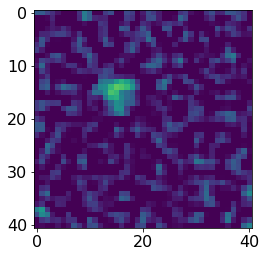

In [169]:
plt.imshow(F, vmin=-0.001, vmax=0.05)

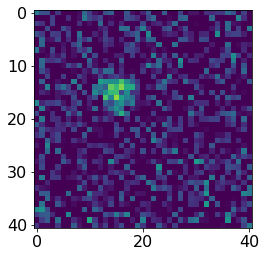

In [170]:
plt.imshow(imagei, vmin=-0.001, vmax=0.05)

1264.0520577010916
1681


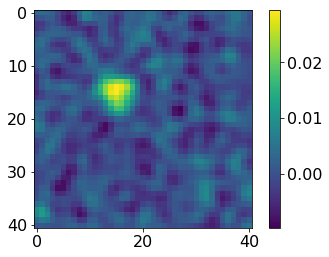

In [171]:
plt.imshow(r)
plt.colorbar()
print(((r - imagei)**2).sum() / (1.e-2)**2)
print(len(r.flatten()))

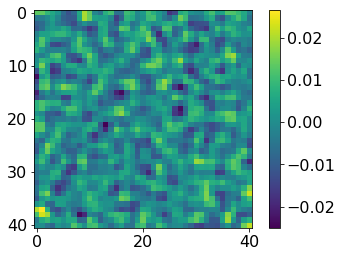

In [172]:
plt.imshow(F - imageo)
plt.colorbar()

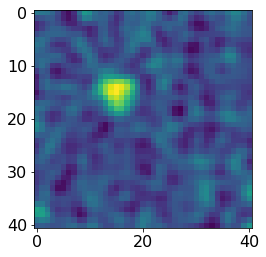

In [176]:
plt.imshow(G)

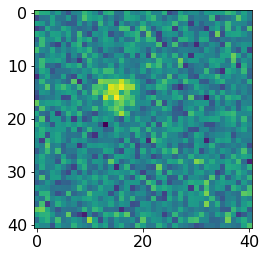

In [174]:
plt.imshow(imagei)